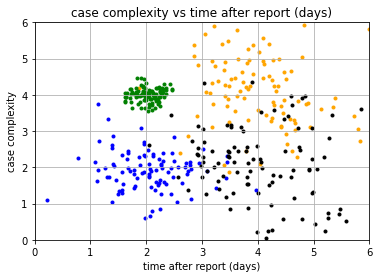

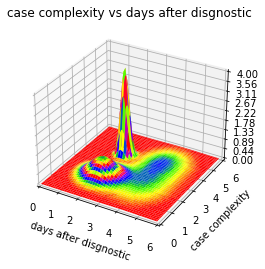

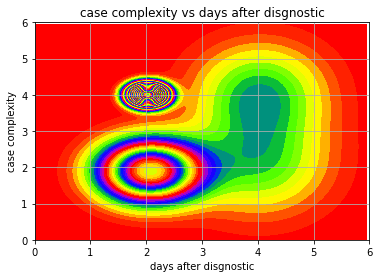

In [8]:
    # <><> Gabriel Aragão - 2021 <><>
    # TODO: a class for a dataset(std deviation,mean)
    #     : 

    # importing libraries

    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.ticker import LinearLocator, FormatStrFormatter

    class dataset(object):
        '''classe dataset para geracao de dados'''
        # Esta classe gera massas de dados segundo distribuicao gaussiana 
        def __init__(self,desvio=[None],media=[None],size=None):
            '''dataset definido por: '''
            #media  = media desejada para [x,y]
            #desvio = desvio padrao deseja para [x, y]
            #size   = total de pontos a[x,y] 
            self.desvio = desvio
            self.media  = media
            self.size   = size

            # gera dados apartir dos parametros 
            self.x      = np.random.normal(self.media[0],self.desvio[0],(self.size,1))
            self.y      = np.random.normal(self.media[1],self.desvio[1],(self.size,1))

            self.media  = [np.mean(self.x),np.mean(self.y)]
            self.desvio = [np.std(self.x),np.std(self.y)]

        def genContorno(self,correlacao,M1,lowLim,highLim):
            '''M1 <- PDF(superficie de probabilidade) do dataset'''
            # correlacao = entre os valores X e Y  
            # M1 = matriz de probabilidades
            # lowLim highLim : limites da superfices
            seqi = np.arange(lowLim,highLim,0.06)
            seqj = np.arange(lowLim,highLim,0.06)
            surface = [np.zeros([len(seqi),len(seqj)])]
            ci = 0
            for i in seqi:
                ci = ci + 1
                cj = 0
                for j in seqj:
                    cj = cj + 1
                    aux  = self.pdf2var(i,j,correlacao)
                    M1[0][ci-1][cj-1] = aux
            return M1 

        def plotContorno(self,datasets=None,lowLimit=None,highLimit=None):
            # include self in the list of datasets
            datasets.append(self)

            # Surface plotting auxiliar stuff
            seqi = np.arange(lowLimit,highLimit,0.06)
            seqj = np.arange(lowLimit,highLimit,0.06)
            X,Y = np.meshgrid(seqi,seqj)
            M0 = [np.zeros([len(seqi),len(seqj)])]
            sumOfDatasetsProbablities = M0
            allClass = []
            # calcula e soma todas superficies de probabilidade 
            if datasets != None:
                for dataset in datasets:
                    M0 = dataset.genContorno(correlacao=0,M1=M0,lowLim=lowLimit,highLim=highLimit)
                    #for M in M[0]:
                    allClass.append(M0)
                    sumOfDatasetsProbablities = M0[0] + sumOfDatasetsProbablities
                '''TODO: SUPERFICI DE CLASSIFICACAO '''

            # contour
            fig, ax = plt.subplots()
            CS = ax.contourf(X,Y,sumOfDatasetsProbablities[0],200, cmap='prism')
            ax.clabel(CS, inline=0,inline_spacing = 0.01, fontsize=0)

            # custumiza eixos
            ax.set_xlim(lowLimit,highLimit)
            ax.set_ylim(lowLimit,highLimit)
            # Axis for interpretation only
            eixos = ['case complexity','days after disgnostic']
            plt.title(eixos[0]+' vs '+eixos[1])
            plt.xlabel(eixos[1])
            plt.ylabel(eixos[0])
            plt.grid()
            plt.plot()

        def genSurface(self,correlacao,M1,lowLim,highLim):
            '''M1 <- PDF(superficie de probabilidade) do dataset'''
            # correlacao = entre os valores X e Y  
            # M1 = matriz de probabilidades
            # lowLim highLim : limites da superfices
            #
            #
            seqi = np.arange(lowLim,highLim,0.06) 
            seqj = np.arange(lowLim,highLim,0.06)
            surface = [np.zeros([len(seqi),len(seqj)])]
            ci = 0
            for i in seqi:
                ci = ci + 1
                cj = 0
                for j in seqj:
                    cj = cj + 1
                    aux  = self.pdf2var(i,j,correlacao)
                    M1[0][ci-1][cj-1] = aux
            return M1 

        def plot3d(self,datasets=None,lowLimit=None,highLimit=None):
            # include self in the list of datasets
            datasets.append(self)

            # Surface plotting auxiliar stuff
            seqi = np.arange(lowLimit,highLimit,0.06)
            seqj = np.arange(lowLimit,highLimit,0.06)
            X,Y = np.meshgrid(seqi,seqj)
            M0 = [np.zeros([len(seqi),len(seqj)])]
            sumOfDatasetsProbablities = M0
            plt.ion()
            fig = plt.figure()
            ax = fig.gca(projection='3d')
            # calcula e soma todas superficies de probabilidade 
            if datasets != None:
                for dataset in datasets:
                    M0 = dataset.genSurface(correlacao=0,M1=M0,lowLim=lowLimit,highLim=highLimit)
                    sumOfDatasetsProbablities = M0[0] + sumOfDatasetsProbablities

            surface  = ax.plot_surface(X,Y,sumOfDatasetsProbablities[0],cmap=cm.prism,linewidth=0, antialiased=True)
            # Customize the z axis.
            ax.set_zlim(0,4.0)
            ax.set_xlim(lowLimit,highLimit)
            ax.set_ylim(lowLimit,highLimit)
            ax.zaxis.set_major_locator(LinearLocator(10))
            ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
            # Axis for interpretation only
            eixos = ['case complexity','days after disgnostic']
            plt.title(eixos[0]+' vs '+eixos[1])
            plt.xlabel(eixos[1])
            plt.ylabel(eixos[0])
            plt.grid()

        def pdf2var(self,x,y,p):
            '''funcao densidade de probabilidade para 2 variaveis'''
            u1,u2 = self.media[1],self.media[0]
            s1,s2 = self.desvio[1],self.desvio[0]
            # x ,y : indices do ponto no espaco R^2
            # u1,u2: media media de cada variavel no dataset 
            # s1,s2: desvio padrao de cada variavel no dataset
            # p    : coeficiente de correlacao 
            A = (1/(2*np.pi*s1*s2*np.sqrt(1-(p**2))))
            B = ((-(1)/(2*(1-(p**2)))))
            C = ((x-u1)**2)/((s1**2))
            D = (((y-u2)**2)/((s2)**2))
            E = ((-2*p*(x-u1)*(y-u2))/(s1*s2)) #termo de covariancia
            return A*np.exp(B*(C+D+E))

        '''TODO: FIX ADD '''    
        def __add__(self,other):
            if self.size == other.size:
                count = 0
                x = self.x + other.x
                y = self.y + other.y
                #print(len(x))
                dataset()
                dataset.x = x
                dataset.y = y
                return dataset()

        def ls(self):
            if input('list metods & attr y/n?') == 'y':
                for attr in dir(self):
                    print("obj.%s = %r" % (attr, getattr(self, attr)))

        def info(self):
            print('desvio: '+str(self.desvio))
            print('media : '+str(self.media))
            print('size  : '+str(self.size))
            if input('print all X and Y? y/n') == 'y':
                print(self.x+'--'+self.y)






    # Dataset creation
    scale = 1
    tamanho = 100
    gaussianA = dataset(media=[4,4],desvio=[0.8,0.8]*scale,size=tamanho)
    gaussianB = dataset(media=[2,2],desvio=[0.6,0.6]*scale,size=tamanho)
    gaussianC = dataset(media=[2,4],desvio=[0.2,0.2]*scale,size=tamanho)
    gaussianD = dataset(media=[4,2],desvio=[0.9,0.9]*scale,size=tamanho)



    # Data plotting

    lowLimit = 0
    upLimit  = 6

    plt.xlim(lowLimit,upLimit)
    plt.ylim(lowLimit,upLimit)
    # Axis for interpretation only
    eixos = ['case complexity','time after report (days)']
    plt.title(eixos[0]+' vs '+eixos[1])
    plt.xlabel(eixos[1])
    plt.ylabel(eixos[0])
    plt.grid()
    plt.scatter(gaussianA.x,gaussianA.y,color='orange',marker='.')
    plt.plot()
    plt.scatter(gaussianB.x,gaussianB.y,color='b',marker='.')
    plt.plot()
    plt.scatter(gaussianC.x,gaussianC.y,color='g',marker='.')
    plt.plot()
    plt.scatter(gaussianD.x,gaussianD.y,color='k',marker='.')
    plt.plot()

    # 3d plotting
    gaussianA.plot3d([gaussianB,gaussianC,gaussianD],lowLimit=lowLimit,highLimit=upLimit)
    gaussianA.plotContorno([gaussianB,gaussianC,gaussianD],lowLimit=lowLimit,highLimit=upLimit)

    plt.show()



